In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv('cell2celltrain.csv')
df.head()


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [3]:
#Missing Value Handeling
df['MonthlyRevenue'].fillna(method='ffill',inplace=True)
df['MonthlyMinutes'].fillna(method='ffill',inplace=True)
df['TotalRecurringCharge'].fillna(method='ffill',inplace=True)
df['DirectorAssistedCalls'].fillna(method='ffill',inplace=True)
df['OverageMinutes'].fillna(method='ffill',inplace=True)
df['PercChangeMinutes'].fillna(method='ffill',inplace=True)
df['PercChangeRevenues'].fillna(method='ffill',inplace=True)
df['RoamingCalls'].fillna(method='ffill',inplace=True)
df['ServiceArea'].fillna(method='ffill',inplace=True)
df['Handsets'].fillna(method='ffill',inplace=True)
df['HandsetModels'].fillna(method='ffill',inplace=True)
df['CurrentEquipmentDays'].fillna(method='ffill',inplace=True)
df['AgeHH1'].fillna(method='ffill',inplace=True)
df['AgeHH2'].fillna(method='ffill',inplace=True)


In [4]:
le_Gender=LabelEncoder()

df['Churn']=le_Gender.fit_transform(df['Churn'])
#print(df.head())
df['ChildrenInHH']=le_Gender.fit_transform(df['ChildrenInHH'])
df['HandsetRefurbished']=le_Gender.fit_transform(df['HandsetRefurbished'])
df['HandsetWebCapable']=le_Gender.fit_transform(df['HandsetWebCapable'])
df['TruckOwner']=le_Gender.fit_transform(df['TruckOwner'])
df['Homeownership']=le_Gender.fit_transform(df['Homeownership'])
df['BuysViaMailOrder']=le_Gender.fit_transform(df['BuysViaMailOrder'])
df['RespondsToMailOffers']=le_Gender.fit_transform(df['RespondsToMailOffers'])
df['OptOutMailings']=le_Gender.fit_transform(df['OptOutMailings'])
df['NonUSTravel']=le_Gender.fit_transform(df['NonUSTravel'])
df['OwnsComputer']=le_Gender.fit_transform(df['OwnsComputer'])
df['HasCreditCard']=le_Gender.fit_transform(df['HasCreditCard'])
df['NewCellphoneUser']=le_Gender.fit_transform(df['NewCellphoneUser'])
df['NotNewCellphoneUser']=le_Gender.fit_transform(df['NotNewCellphoneUser'])
df['ReferralsMadeBySubscriber']=le_Gender.fit_transform(df['ReferralsMadeBySubscriber'])
df['OwnsMotorcycle']=le_Gender.fit_transform(df['OwnsMotorcycle'])
df['MaritalStatus']=le_Gender.fit_transform(df['MaritalStatus'])
df['MadeCallToRetentionTeam']=le_Gender.fit_transform(df['MadeCallToRetentionTeam'])
df['RVOwner']=le_Gender.fit_transform(df['RVOwner'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  int32  
 2   MonthlyRevenue             51047 non-null  float64
 3   MonthlyMinutes             51047 non-null  float64
 4   TotalRecurringCharge       51047 non-null  float64
 5   DirectorAssistedCalls      51047 non-null  float64
 6   OverageMinutes             51047 non-null  float64
 7   RoamingCalls               51047 non-null  float64
 8   PercChangeMinutes          51047 non-null  float64
 9   PercChangeRevenues         51047 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [5]:
df=df.drop(['Occupation','PrizmCode','CreditRating','HandsetPrice','ServiceArea','CustomerID','AgeHH1','AgeHH2'],axis=1)
df=df.drop(['HandsetRefurbished','Homeownership','ReferralsMadeBySubscriber'],axis=1)

In [7]:
df=df.drop(['NonUSTravel','OwnsComputer','NewCellphoneUser','OwnsMotorcycle','AdjustmentsToCreditRating',],axis=1)

KeyError: "['NonUSTravel' 'OwnsComputer' 'NewCellphoneUser' 'OwnsMotorcycle'\n 'AdjustmentsToCreditRating'] not found in axis"

In [6]:
df.shape

(51047, 47)

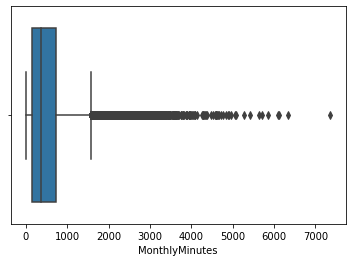

In [8]:
sns.boxplot(df['MonthlyMinutes'])

In [9]:
#Outlier Handling
outlier=[]
z=[]
for col in df:
    sorted(df[col])
    q1, q3= np.percentile(df[col],[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    #print(lower_bound,upper_bound)
    tempdf=df.loc[(df[col]<lower_bound) | (df[col]>upper_bound)]
    outlier.append(len(tempdf[col]))
    #print(tempdf.head(10))
    x=len(tempdf[col])
    y=len(df[col])
    z=((x/y))
    if z>0 and z<.05:
        df = df[~((df[col] < (lower_bound)) |(df[col] > (upper_bound)))]  
    else:
        new=(np.cbrt(df[col]))
        #print(type(new))
        df1=pd.DataFrame(new)
        #print(df1.head())
        df.drop([col],axis=1,inplace=True)
        df=pd.concat((df,df1),axis=1)
print(outlier)

[0, 3012, 2582, 825, 6608, 5693, 9785, 6660, 13174, 3760, 5258, 3423, 6510, 4413, 3450, 3191, 4837, 2508, 3055, 3374, 195, 6522, 978, 1660, 0, 2841, 1110, 973, 10383, 3856, 7872, 3380, 0, 0, 651, 0, 1324, 0, 4921, 0, 0, 0]


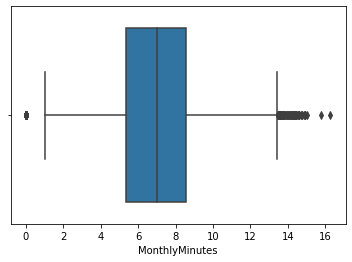

In [10]:
sns.boxplot(df['MonthlyMinutes'])

In [34]:
list2=[]
for col in df:
    list2.append(df[col].skew())
print(list2)

[0.37747388586267294, 0.9321422471520113, 0, 0.7532622755359493, 1.1997427997232342, 1.3065658729398901, 0.617893984694434, 0, 0, 0.9629544741161542, 0.5445092625460027, -0.18146784918295011, 0.708843277109552, 0.7811462245447812, 2.4114887798953686, 0.1228816886858788, 0.407892346282728, -0.024369277498979953, 0.8002418538444578, -0.1608397110842604, 1.0644348024923058, 1.6632389375611945, 0.05410743728208521, -0.1355563234722919, 0.4326064578840708, -0.09034731714114394, 0.03209945974694854, 0.8091308661929879, 0.8582473691460547, 1.1750597238956642, 1.2081268022144491, -2.887043303140645, 1.640056975037521, 3.1373500265060743, 0.5827213393669398, 0.5181039576938855, -0.734396079908504, 0, 2.3309093614796494, -0.8758553286195597, 0, -0.990513028554613]


In [35]:
#outlier=[]
i=0
#print(list[1])
for col in df:
    if(list2[i]>1):
        new1=(np.cbrt(df[col]))
        #print(type(new))
        df1=pd.DataFrame(new1)
        #print(df1.head())
        df.drop([col],axis=1,inplace=True)
        df=pd.concat((df,df1),axis=1)
        i+=1
    else:
        i+=1

In [36]:
list1=[]
for col in df:
    list1.append(df[col].skew())
print(list1)

[0.37747388586267294, 0.9321422471520113, 0, 0.7532622755359493, 0.617893984694434, 0, 0, 0.9629544741161542, 0.5445092625460027, -0.18146784918295011, 0.708843277109552, 0.7811462245447812, 0.1228816886858788, 0.407892346282728, -0.024369277498979953, 0.8002418538444578, -0.1608397110842604, 0.05410743728208521, -0.1355563234722919, 0.4326064578840708, -0.09034731714114394, 0.03209945974694854, 0.8091308661929879, 0.8582473691460547, -2.887043303140645, 0.5827213393669398, 0.5181039576938855, -0.734396079908504, 0, -0.8758553286195597, 0, -0.990513028554613, 0.9559081471502107, 1.0684071551438843, 0.9691632187422394, 0.3579148738327278, 1.1412799802207272, 1.0203272958477718, 1.2081268022144491, 1.640056975037521, 3.1373500265060743, 2.3309093614796494]


In [37]:
feature=[]
x=df.drop("Churn",axis=1)
y=df['Churn']
bestfeatures=SelectKBest(score_func=f_classif,k=13)
fit=bestfeatures.fit_transform(x,y)
cols=x.columns.values[bestfeatures.get_support()]
feature.append(cols)
print(feature)
#scores=bestfeatures.scores_[bestfeatures.get_support()]
#print(scores)
#name_scores=list(zip(cols,scores))
#print(name_scores)
#newdf=pd.DataFrame(cols)
#newdf

[array(['TotalRecurringCharge', 'CurrentEquipmentDays', 'MonthlyMinutes',
       'PercChangeMinutes', 'UnansweredCalls', 'ReceivedCalls',
       'OutboundCalls', 'InboundCalls', 'OffPeakCallsInOut',
       'HandsetWebCapable', 'UniqueSubs', 'HandsetModels',
       'CustomerCareCalls'], dtype=object)]


E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 2  5  6 27 29] are constant.
  UserWarning)
E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [12]:

m=int(np.sqrt(len(df)))
print(m)

202


E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.716848
KNN: 0.672274


E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Decision Tree: 0.612086


E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NB: 0.675703


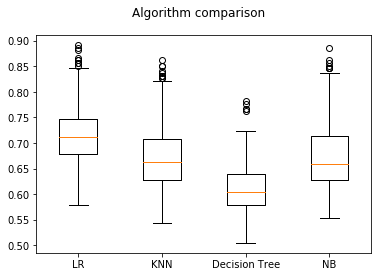

In [24]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#Load dataset k=15

for col in feature:
    X=df[col]
Y=df['Churn']

seed=7
#prepare models
models=[]
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('Decision Tree',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
# evaluate each model in turn
results=[]
names=[]
scoring='accuracy'
for name,model in models:
    kfold=model_selection.KFold(n_splits=int(np.sqrt(len(df))),random_state=seed)
    cv_results=model_selection.cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f" % (name,cv_results.mean())
    print(msg)
#boxplot algorithm comparison    
fig=plt.figure()
fig.suptitle('Algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [14]:
#Logistic Regression
from sklearn.model_selection import train_test_split
for col in feature:
    X=df[col]
#print(pd.DataFrame(x))
#x.head(10)
#x.shape
#x=df[newdf]
Y=df['Churn']
from sklearn.model_selection import train_test_split
# from sklearn, cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
# random_state=1 fixes the shuffling algorithm, otherwise we'll get different levels of accuracy each time we run the program
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,Y_train)
predictions=logmodel.predict(X_test)
#print(predictions,':',y_test)
print(predictions)
# for model accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)

[0. 0. 0. ... 0. 0. 1.]


E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.72434065485425

In [15]:
#KNN
for col in feature:
    X=df[col]
Y=df['Churn']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
classifier=KNeighborsClassifier(n_neighbors=19,metric='euclidean')
classifier.fit(X_train,Y_train)
y_pred=classifier.predict(X_test)
accuracy_score(Y_test,predictions)

0.7145423368988324

In [16]:
#Decission Tree
from sklearn.tree import DecisionTreeClassifier
for col in feature:
    X=df[col]
Y=df['Churn']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)
classifier_entropy=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3)
#Create The Model
classifier_entropy.fit(X_train,Y_train)
y_pred=classifier_entropy.predict(X_test)
print("Acuracy is",accuracy_score(Y_test,y_pred)*100)

Acuracy is 72.54837919490488


In [38]:
#Feature Selection 2
feature=[]
x=df.drop("Churn",axis=1)
y=df['Churn']
bestfeatures=SelectKBest(score_func=f_classif,k=12)
fit=bestfeatures.fit_transform(x,y)
cols=x.columns.values[bestfeatures.get_support()]
feature.append(cols)
print(feature)

[array(['TotalRecurringCharge', 'CurrentEquipmentDays', 'MonthlyMinutes',
       'PercChangeMinutes', 'UnansweredCalls', 'ReceivedCalls',
       'OutboundCalls', 'InboundCalls', 'OffPeakCallsInOut',
       'HandsetWebCapable', 'UniqueSubs', 'CustomerCareCalls'],
      dtype=object)]


E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 2  5  6 27 29] are constant.
  UserWarning)
E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [18]:
#Logistic Regression
from sklearn.model_selection import train_test_split
for col in feature:
    X=df[col]
#print(pd.DataFrame(x))
#x.head(10)
#x.shape
#x=df[newdf]
Y=df['Churn']
from sklearn.model_selection import train_test_split
# from sklearn, cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
# random_state=1 fixes the shuffling algorithm, otherwise we'll get different levels of accuracy each time we run the program
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,Y_train)
predictions=logmodel.predict(X_test)
#print(predictions,':',y_test)
print(predictions)
# for model accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)

[0. 0. 0. ... 0. 0. 1.]


E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7240956969053646

In [19]:
#KNN
for col in feature:
    X=df[col]
Y=df['Churn']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
classifier=KNeighborsClassifier(n_neighbors=19,metric='euclidean')
classifier.fit(X_train,Y_train)
y_pred=classifier.predict(X_test)
accuracy_score(Y_test,predictions)

0.7141340736506899

In [23]:
#Decission Tree
from sklearn.tree import DecisionTreeClassifier
for col in feature:
    X=df[col]
Y=df['Churn']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)
classifier_entropy=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3)
#Create The Model
classifier_entropy.fit(X_train,Y_train)
y_pred=classifier_entropy.predict(X_test)
print("Accuracy is",accuracy_score(Y_test,y_pred)*100)

Accuracy is 72.61370131460765


In [ ]:
sns.heatmap(df,xticklabels=df.columns,yticklabels=df.columns,annot=True)

In [16]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
X=df.drop('Churn',axis=1)
Y=df['Churn']
num_trees=100
max_features=17
kfold=model_selection.KFold(n_splits=10,random_state=7)
model=RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results=model_selection.cross_val_score(model,X,Y,cv=kfold)
print(results.mean())

E:\SOFTWARE\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.7202560886590987


Confusn matrix:
 [[8493  377]
 [3011  366]]
Specificity:  0.10838021912940479
Accuracy Score:  0.7233608230587083
Precision;  0.49259757738896365
Recall Score:  0.10838021912940479
F1 Score 0.17766990291262136


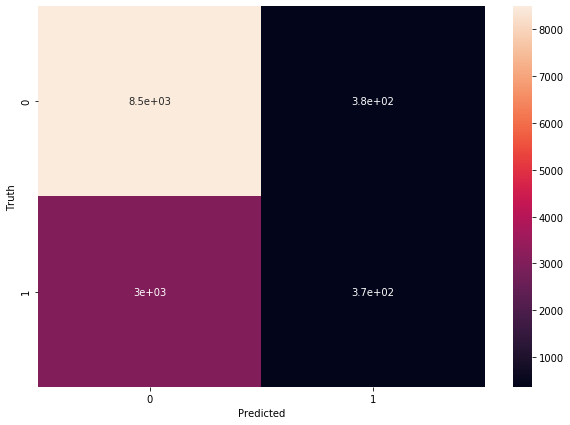

In [39]:
#Random Forest
from sklearn.model_selection import train_test_split
for col in feature:
    X=df[col]
Y=df['Churn']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=100)
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('Confusn matrix:\n',cm)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity: ',specificity)
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test,y_pred)
print('Accuracy Score: ',accuracy_score)

from sklearn.metrics import precision_score
precision_score = precision_score(y_test,y_pred)
print('Precision; ',precision_score)

from sklearn.metrics import recall_score
recall_score = recall_score(y_test,y_pred)
print('Recall Score: ',recall_score)

from sklearn.metrics import f1_score
f1_score = f1_score(y_test,y_pred)
print('F1 Score',f1_score)